In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import numpy as np
from IPython.display import display

In [2]:
from extract import locm


path = '../output/final/'
all_files = glob.glob(path + "/*.csv")
print(all_files)
dfs = [pd.read_csv(f) for f in all_files]
df = pd.concat(dfs, ignore_index=True)

df['scaled_dod'] = df['actual_dod'] * 1000
display(df)
success_df = df[df['result'] == 'Success']
locm_df = df[df['dod'] == 0]
locm_success_df = success_df[success_df['dod'] == 0]
polocm_df = df[df['dod']>0]
polocm_success_df = success_df[success_df['dod'] >0]

polocm_success_df = polocm_success_df.merge(locm_success_df[['lo_id', 'executability']], on='lo_id', suffixes=('', '_locm'))
polocm_success_df['exe_diff'] = polocm_success_df['executability_locm'] - polocm_success_df['executability']

# Calculate the mean executability for LOCM2 for each domain
locm_exe_means = locm_success_df.groupby("domain")["executability"].mean()
polocm_success_df = polocm_success_df.merge(locm_exe_means, on='domain', suffixes=('', '_locm_means'))

display(polocm_success_df[polocm_success_df['domain']=='satellite'])

['../output/final/results_0.3.csv', '../output/final/results_0.5.csv', '../output/final/results_0.1.csv', '../output/final/results_0.8.csv', '../output/final/results_0.9.csv', '../output/final/results_0.6.csv', '../output/final/results_0.0.csv', '../output/final/results_0.2.csv', '../output/final/results_0.4.csv', '../output/final/results_0.7.csv']


,lo_id,dod,actual_dod,domain,index,num_objects,total_length,size,measurement,runtime,polocm_time,locm2_time,locm_time,accuracy,error_rate,executability,result,scaled_dod
0,0,0.3,0.311111,floortile,0,40,10,1,flex,0.761791,0.588362,0.156656,0.016773,1.000000,0.000000,0.90,Success,311.111111
1,1,0.3,0.318519,floortile,0,33,30,3,flex,1.163842,1.010202,0.142918,0.010721,1.000000,0.000000,1.00,Success,318.518519
2,64,0.3,0.304762,satellite,0,42,15,1,flex,2.689624,2.528023,0.150589,0.011013,1.000000,0.000000,0.80,Success,304.761905
3,32,0.3,0.313333,childsnack,0,37,100,10,flex,3.475420,3.288282,0.162759,0.024380,0.947421,0.008929,0.97,Success,313.333333
4,2,0.3,0.311111,floortile,0,30,50,5,flex,1.826363,1.648190,0.152756,0.025417,1.000000,0.000000,0.74,Success,311.111111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2324,259,0.7,0.703406,sokoban,0,119,139,5,flex,1200.000000,1200.000000,0.000000,0.000000,0.000000,0.000000,0.00,Timeout,703.406366
2325,282,0.7,0.702317,miconic,0,29,34,1,flex,1200.000000,1200.000000,0.000000,0.000000,0.000000,0.000000,0.00,Timeout,702.317291
2326,283,0.7,0.704940,miconic,0,19,62,3,flex,1200.000000,1200.000000,0.000000,0.000000,0.000000,0.000000,0.00,Timeout,704.940158
2327,284,0.7,0.729631,miconic,0,17,91,5,flex,1200.000000,1200.000000,0.000000,0.000000,0.000000,0.000000,0.00,Timeout,729.630761


,lo_id,dod,actual_dod,domain,index,num_objects,total_length,size,measurement,runtime,...,locm2_time,locm_time,accuracy,error_rate,executability,result,scaled_dod,executability_locm,exe_diff,executability_locm_means
2,64,0.3,0.304762,satellite,0,42,15,1,flex,2.689624,...,0.150589,0.011013,1.000000,0.0000,0.800000,Success,304.761905,0.800000,0.000000,0.640266
16,65,0.3,0.304762,satellite,0,29,45,3,flex,103.107878,...,0.158474,0.022654,0.829000,0.0855,0.955556,Success,304.761905,0.777778,-0.177778,0.640266
18,66,0.3,0.306667,satellite,0,27,75,5,flex,32.369721,...,0.173850,0.030572,1.000000,0.0000,0.693333,Success,306.666667,0.733333,0.040000,0.640266
23,67,0.3,0.306667,satellite,0,27,150,10,flex,333.490129,...,0.185101,0.048747,0.911000,0.0285,0.693333,Success,306.666667,0.753333,0.060000,0.640266
40,58,0.3,0.311111,satellite,0,42,10,1,flex,1.090533,...,0.361972,0.012032,0.812500,0.0750,0.800000,Success,311.111111,0.700000,-0.100000,0.640266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,66,0.4,0.400000,satellite,0,27,75,5,flex,128.797208,...,0.179592,0.029907,0.886000,0.0490,0.573333,Success,400.000000,0.733333,0.160000,0.640266
792,58,0.4,0.400000,satellite,0,42,10,1,flex,1.605070,...,0.532815,0.009847,0.787500,0.0750,0.800000,Success,400.000000,0.700000,-0.100000,0.640266
793,59,0.4,0.400000,satellite,0,29,30,3,flex,3.152406,...,0.578625,0.018736,0.754444,0.0200,1.000000,Success,400.000000,0.733333,-0.266667,0.640266
875,58,0.7,0.711111,satellite,0,42,10,1,flex,11.184960,...,0.812059,0.015771,0.787500,0.0750,0.800000,Success,711.111111,0.700000,-0.100000,0.640266


domain  blocksworld  childsnack       ferry  floortile     miconic     rovers  \
dod                                                                             
0.1      100.000000  100.000000  100.000000  79.310345  100.000000  68.965517   
0.2       68.965517   65.517241   62.068966  62.068966  100.000000  44.827586   
0.3       58.620690   37.931034   51.724138  44.827586   51.724138  31.034483   
0.4       55.172414   27.586207   44.827586  41.379310   37.931034  27.586207   
0.5       44.827586   20.689655   39.285714  27.586207   47.368421  13.793103   
0.6       40.000000   21.428571   24.000000  22.727273   20.689655  14.285714   
0.7       34.482759   10.344828   24.137931  13.793103   13.793103  10.344828   
0.8             NaN   11.764706         NaN  16.666667         NaN        NaN   
0.9             NaN    6.250000         NaN  12.000000         NaN        NaN   

domain  satellite     sokoban     spanner  transport  
dod                                                  

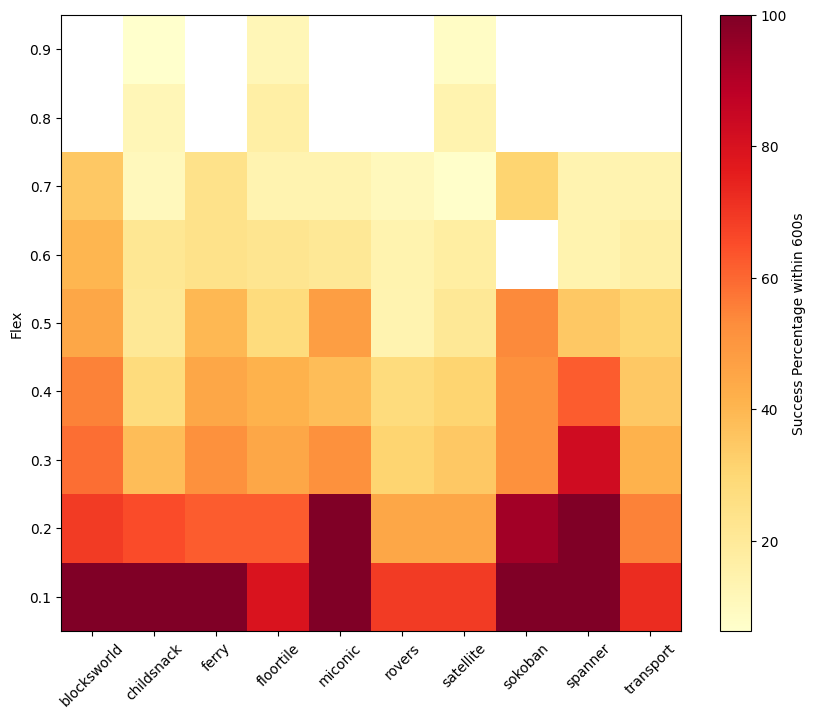

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter for successful runs within the 600s limit
within_limit_df = polocm_df[(polocm_df['result'] == 'Success') ]

# Group by domain and dod, and count the total and successful instances
total_instances = polocm_df.groupby(['domain', 'dod']).size().reset_index(name='total_count')
success_instances = within_limit_df.groupby(['domain', 'dod']).size().reset_index(name='success_count')

# Merge the total and success counts
result_summary = total_instances.merge(success_instances, on=['domain', 'dod'], how='left')
result_summary['success_count'] = result_summary['success_count'].fillna(0)

# Calculate the success percentage
result_summary['success_percentage'] = (result_summary['success_count'] / result_summary['total_count']) * 100

# Pivot the table to get domains as columns and dod as rows
pivot_table = result_summary.pivot(index='dod', columns='domain', values='success_percentage').sort_index()

# Display the pivot table
print(pivot_table)

# Optional: Plotting the pivoted table as a heatmap for visual clarity
plt.figure(figsize=(10, 8))
plt.imshow(pivot_table, aspect='auto', cmap="YlOrRd", origin='lower')
plt.colorbar(label="Success Percentage within 600s")
plt.xticks(range(len(pivot_table.columns)), pivot_table.columns, rotation=45)
plt.yticks(range(len(pivot_table.index)), pivot_table.index)
plt.ylabel("Flex")
plt.show()


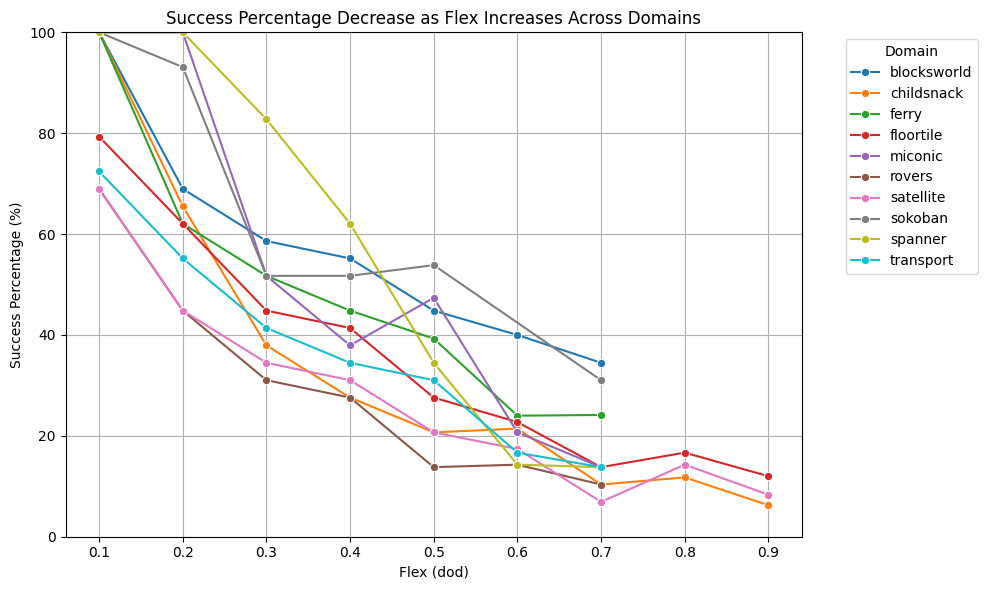

In [4]:

# Reset the index of the pivot table to use 'dod' as a column and reshape it
pivot_table_reset = pivot_table.reset_index().melt(id_vars=['dod'], var_name='domain', value_name='success_percentage')

# Plotting success percentage for each domain on a single plot based on dod
plt.figure(figsize=(10, 6))
sns.lineplot(data=pivot_table_reset, x='dod', y='success_percentage', hue='domain', marker='o')

# Customize labels, title, and y-axis limits
plt.xlabel("Flex (dod)")
plt.ylabel("Success Percentage (%)")
plt.title("Success Percentage Decrease as Flex Increases Across Domains")
plt.ylim(0, 100)  # Set y-axis limits to [0, 100] for clarity
plt.legend(title='Domain', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


/tmp/ipykernel_1912244/4235418664.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  polocm_df['total_length_binned'] = pd.cut(polocm_df['total_length'], bins=bins, labels=bin_labels, right=True)
/tmp/ipykernel_1912244/4235418664.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_instances_length = polocm_df.groupby('total_length_binned').size()
/tmp/ipykernel_1912244/4235418664.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior 

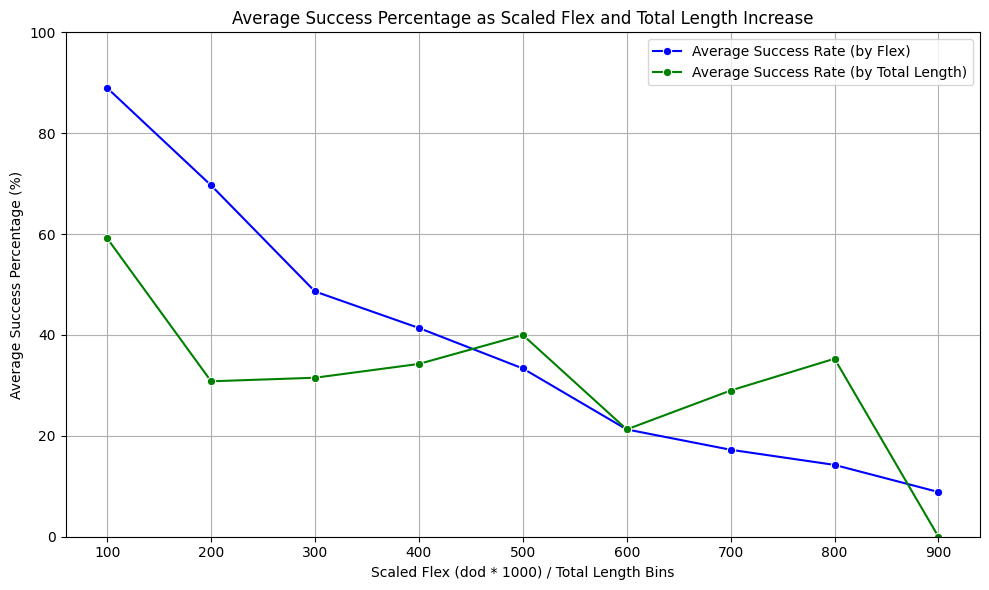

In [14]:
# Add a column for scaled_dod by multiplying each dod value by 1000
average_success_percentage = pivot_table.mean(axis=1).reset_index(name='average_success_percentage')
average_success_percentage['scaled_dod'] = average_success_percentage['dod'] * 1000


# Assuming `pivot_table` is defined and contains the success rate data for each dod and domain

# Add a column for scaled_dod by multiplying each dod value by 1000
average_success_percentage = pivot_table.mean(axis=1).reset_index(name='average_success_percentage')
average_success_percentage['scaled_dod'] = average_success_percentage['dod'] * 1000

# Calculate success rate for different total length bins
bins = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
bin_labels = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]

# Assuming `polocm_df` is the original DataFrame with `total_length` and `result`
polocm_df['total_length_binned'] = pd.cut(polocm_df['total_length'], bins=bins, labels=bin_labels, right=True)
total_instances_length = polocm_df.groupby('total_length_binned').size()
success_instances_length = polocm_df[polocm_df['result'] == 'Success'].groupby('total_length_binned').size()

# Calculate success percentage per length bin
success_rate_length = (success_instances_length / total_instances_length * 100).reset_index(name='success_percentage')
success_rate_length['total_length_binned'] = success_rate_length['total_length_binned'].astype(int)

# Plotting
plt.figure(figsize=(10, 6))

# Plot average success percentage as scaled_dod increases
sns.lineplot(data=average_success_percentage, x='scaled_dod', y='average_success_percentage', marker='o', color='blue', label='by Flex')
# Plot success percentage as total length increases
sns.lineplot(data=success_rate_length, x='total_length_binned', y='success_percentage', marker='o', color='green', label='by Total Length')

# Customize labels and title
plt.xlabel("Scaled Flex (Flex * 1000) / Total Length Bins")
plt.ylabel("Average Success Percentage (%)")
plt.title("Average Success Percentage as Scaled Flex and Total Length Increase")
plt.ylim(0, 100)
plt.legend()
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


In [12]:
# # Filter for successful runs within the 600s limit
# within_limit_df = polocm_df[(polocm_df['result'] == 'Success') ]

# # Group by domain and dod, and count the total and successful instances
# total_instances = polocm_df.groupby(['domain', 'dod']).size().reset_index(name='total_count')
# success_instances = within_limit_df.groupby(['domain', 'dod']).size().reset_index(name='success_count')

# # Merge the total and success counts
# result_summary = total_instances.merge(success_instances, on=['domain', 'dod',], how='left')

# result_summary['success_count'] = result_summary['success_count'].fillna(0)
# result_summary['scaled_dod'] = result_summary['dod'] * 1000
# # Calculate the success percentage
# result_summary['success_percentage'] = (result_summary['success_count'] / result_summary['total_count']) * 100

# # Pivot the table to get domains as columns and dod as rows
# pivot_table = result_summary.pivot(index='dod', columns='domain', values='success_percentage').sort_index()



# # Define the bin edges and labels up to 1000
# bins = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# bin_labels = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]

# # Add a new column to `polocm_df` with the binned `total_length`
# polocm_df['total_length_binned'] = pd.cut(polocm_df['total_length'], bins=bins, labels=bin_labels, right=True)

# # Now group by `domain`, `dod`, and the binned `total_length`
# total_instances_tl = polocm_df.groupby(['domain', 'total_length_binned']).size().reset_index(name='total_count')
# success_instances_tl = within_limit_df.groupby(['domain', 'total_length_binned']).size().reset_index(name='success_count')

# # Merge the total and success counts
# result_summary_tl = total_instances_tl.merge(success_instances_tl, on=['domain', 'total_length_binned',], how='left')

# result_summary_tl['success_count'] = result_summary_tl['success_count'].fillna(0)

# # Calculate the success percentage
# result_summary_tl['success_percentage'] = (result_summary_tl['success_count'] / result_summary_tl['total_count']) * 100




# # Set up the FacetGrid to create a plot for each domain
# g = sns.FacetGrid(result_summary, col="domain", col_wrap=5, height=4, aspect=1.5)

# # Plot success percentage across different `dod` values as a blue line
# g.map_dataframe(sns.regplot, x="scaled_dod", y="success_percentage", line_kws={'color':'blue', 'lw':1}, scatter=False, lowess=True)

# for ax, (domain, domain_data) in zip(g.axes.flat, result_summary_tl.groupby("domain")):
#     sns.regplot(
#         data=domain_data,
#         ax=ax,
#         x="total_length_binned",
#         y="success_percentage",
#         line_kws={'color':'red', 'lw':1}, scatter=False, lowess=True
#     )

# for ax in g.axes.flat:
#     ax.legend(["Flex Success", "Total Length"], loc="upper left")


# # Set axis labels and title
# g.set_axis_labels("Flex*1000/Total Length", "Success Percentage")
# g.set_titles("{col_name}")

# # Adjust layout and show the plot
# plt.tight_layout()
# plt.show()

<Figure size 1000x600 with 0 Axes>

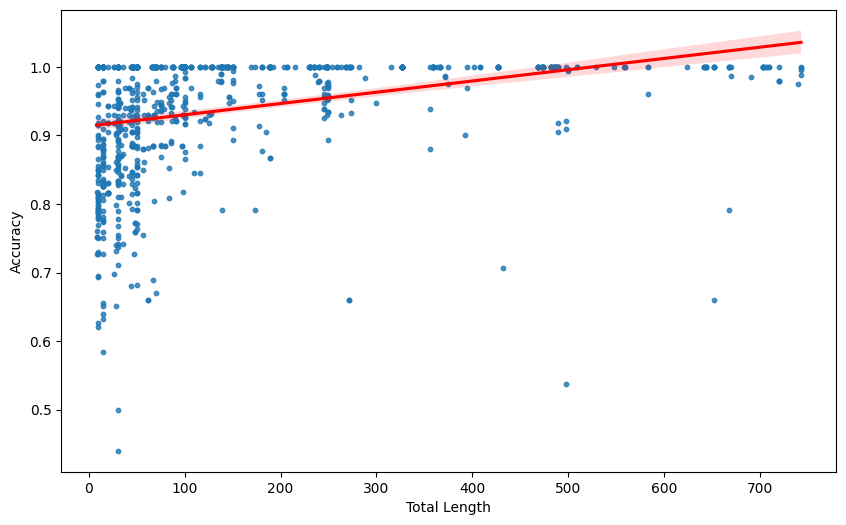

In [6]:

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))


# You can do the same for total_length
plt.figure(figsize=(10, 6))
sns.regplot(x='total_length', y='accuracy', data=polocm_success_df, scatter_kws={'s':10}, line_kws={'color':'red'})
plt.xlabel('Total Length')
plt.ylabel('Accuracy')
plt.show()



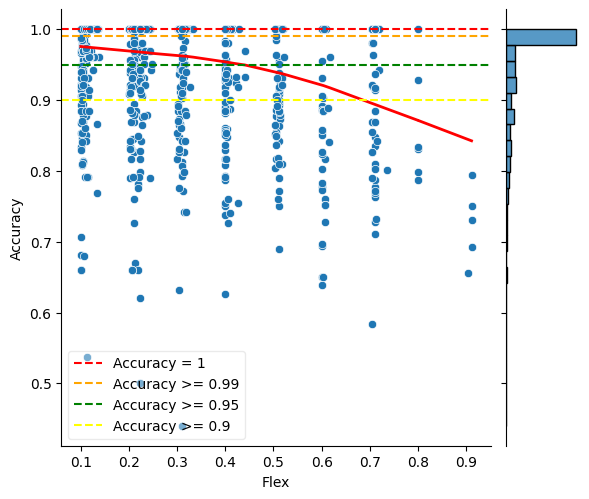

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the joint plot without the marginal x-axis bars
g = sns.jointplot(x='actual_dod', y='accuracy', data=polocm_success_df, kind='scatter', marginal_kws={'bins': 25, 'fill': True})

# Remove x-axis marginal plot
g.ax_marg_x.set_visible(False)

# Add regression line to show the trend
sns.regplot(x='actual_dod', y='accuracy', data=polocm_success_df, lowess=True, scatter=False, ax=g.ax_joint, color='red', line_kws={'lw': 2})

# Change the color of y-axis marginal bars to match the scatter and lines
# for bar in g.ax_marg_y.patches:
#     bar.set_facecolor('blue')

# Add the horizontal lines back with accuracy thresholds
g.ax_joint.axhline(y=1, color='red', linestyle='--', label='Accuracy = 1')
g.ax_joint.axhline(y=0.99, color='orange', linestyle='--', label='Accuracy >= 0.99')
g.ax_joint.axhline(y=0.95, color='green', linestyle='--', label='Accuracy >= 0.95')
g.ax_joint.axhline(y=0.9, color='yellow', linestyle='--', label='Accuracy >= 0.9')

plt.xlabel('Flex')
plt.ylabel('Accuracy')
# Set the legend transparency (alpha)
legend = plt.legend(loc='lower left', framealpha=0.4)  # Adjust the transparency with framealpha
plt.show()


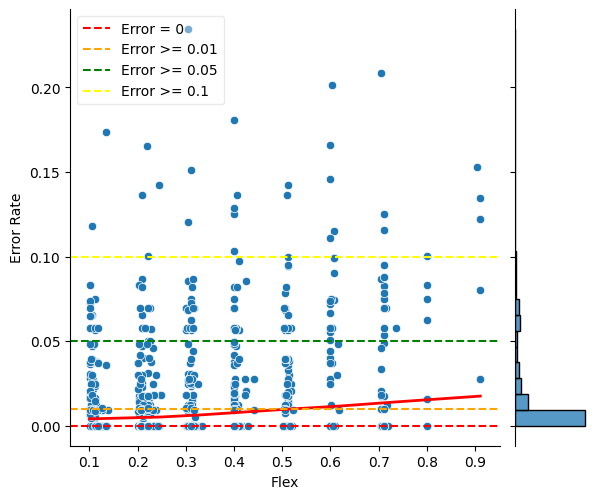

In [8]:
# Create the joint plot without the marginal x-axis bars
g = sns.jointplot(x='actual_dod', y='error_rate', data=polocm_success_df, kind='scatter', marginal_kws={'bins': 25, 'fill': True})

# Remove x-axis marginal plot
g.ax_marg_x.set_visible(False)

# Add regression line to show the trend
sns.regplot(x='actual_dod', y='error_rate', data=polocm_success_df, lowess=True, scatter=False, ax=g.ax_joint, color='red', line_kws={'lw': 2})

# Change the color of y-axis marginal bars to match the scatter and lines
# for bar in g.ax_marg_y.patches:
#     bar.set_facecolor('blue')

# Add the horizontal lines back with accuracy thresholds
g.ax_joint.axhline(y=0, color='red', linestyle='--', label='Error = 0')
g.ax_joint.axhline(y=0.01, color='orange', linestyle='--', label='Error >= 0.01')
g.ax_joint.axhline(y=0.05, color='green', linestyle='--', label='Error >= 0.05')
g.ax_joint.axhline(y=0.1, color='yellow', linestyle='--', label='Error >= 0.1')

plt.xlabel('Flex')
plt.ylabel('Error Rate')
# Set the legend transparency (alpha)
legend = plt.legend(loc='upper left', framealpha=0.4)  # Adjust the transparency with framealpha
plt.show()

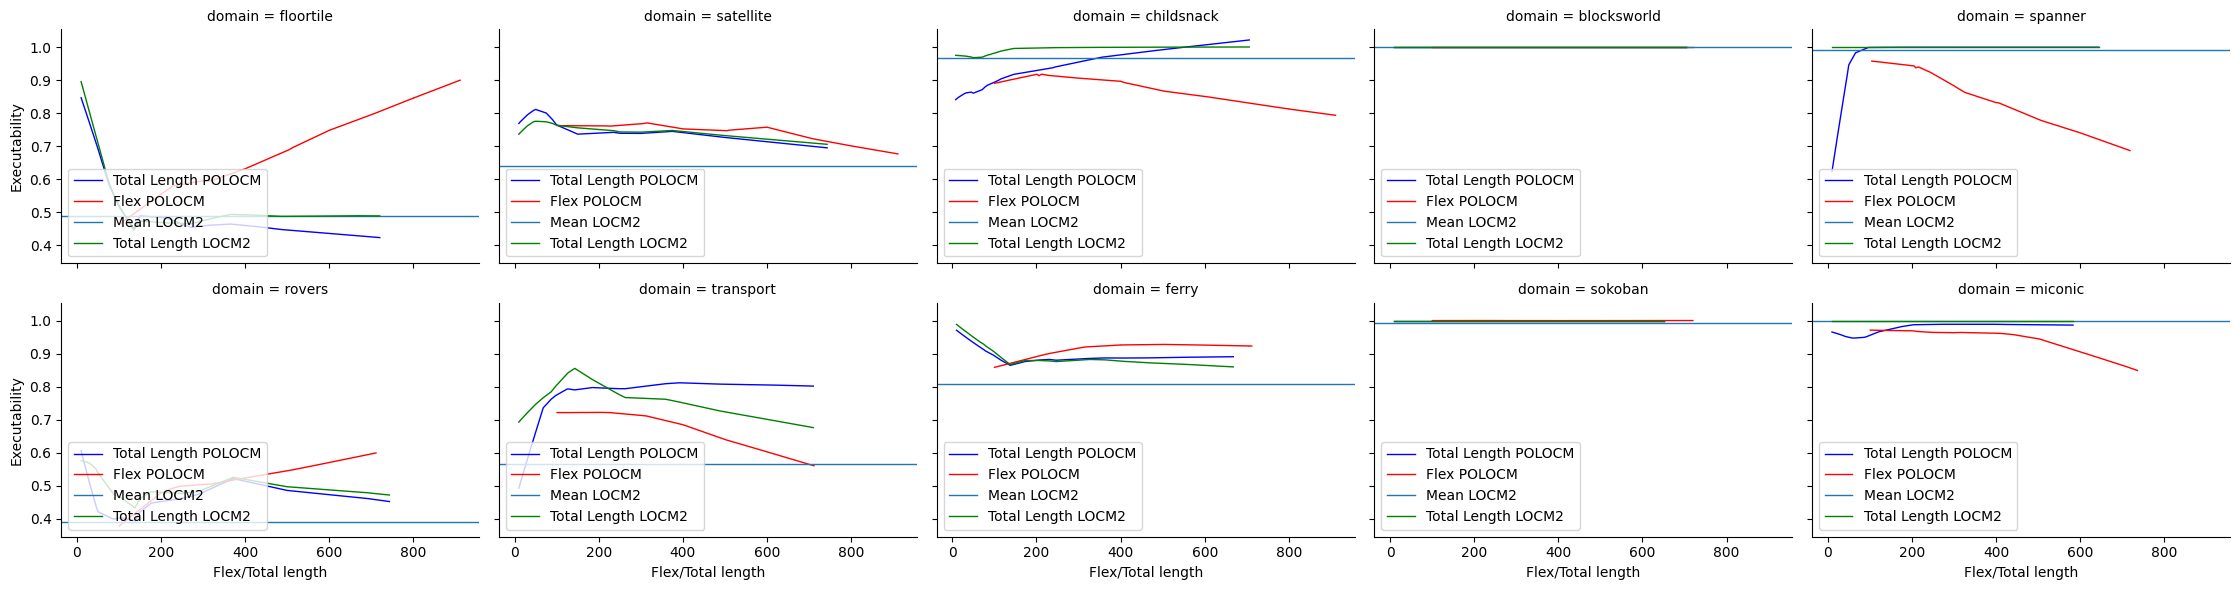

In [9]:


# Set up the facet grid to create a plot for each domain
g = sns.FacetGrid(polocm_success_df, col="domain", col_wrap=5, height=3, aspect=1.5)

g.map_dataframe(sns.regplot, x="total_length", y="executability", line_kws={'color':'blue', 'lw':1}, scatter=False, lowess=True)

# Second line for scaled_dod vs runtime with LOWESS smoothing
g.map_dataframe(sns.regplot, x="scaled_dod", y="executability", line_kws={'color':'red', 'lw':1}, scatter=False, lowess=True)

# # First line for total_length vs runtime with LOWESS smoothing
# g.map_dataframe(sns.regplot, x="total_length", y="executability", line_kws={'color':'blue', 'lw':1}, scatter=False, lowess=True)

# g.map_dataframe(sns.regplot, x="scaled_dod", y="executability_locm", line_kws={'color':'orange', 'lw':1}, scatter=False, lowess=True)



def add_horizontal_line(data, color='orange', **kwargs):
    mean_value = data["executability_locm_means"].iloc[0]  # Get the mean value for this domain
    plt.axhline(mean_value, color=color, linestyle='-', linewidth=1)

g.map_dataframe(add_horizontal_line)

g.map_dataframe(sns.regplot, x="total_length", y="executability_locm", line_kws={'color':'green', 'lw':1}, scatter=False, lowess=True)

# Customize the legend and labels
for ax in g.axes.flat:
    ax.legend(["Total Length POLOCM", "Flex POLOCM", "Mean LOCM2", "Total Length LOCM2"], loc="lower left")

g.set_axis_labels("Flex/Total length", "Executability")
# Adjust layout and show the plot
plt.tight_layout()
plt.show()
